In [1]:
# This is a Python block

In [2]:
import os  
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('/work/2023-06-01 hourly data/altaeros_flight_data_20230601_21.csv')

In [4]:
df.shape

(86366, 15)

In [5]:
air_density_kgPm3 = 1.2
g_mPs2 = 9.81
df['pressure_air_Pa'] = df['pressure_ground_Pa'] - air_density_kgPm3 * g_mPs2 * df['altitude_m']

In [6]:
in_flight = df.loc[df['altitude_m']>100]

In [7]:
in_flight.shape

(8165, 16)

In [8]:
in_flight.head()

,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_NED_mPs,wind_direction_air_NED_deg,wind_elevation_air_NED_deg,humidity_air_pct,temperature_air_degC,pressure_ground_Pa,humidity_ground_pct,temperature_ground_degC,pressure_air_Pa
44305,01-Jun-2023 12:19:23,1034.016910,1650.488926,1254.116213,1262.613070,0.002521,333.916440,0.663894,266.421388,18.892440,52.037094,24.186509,101416.974394,45.887617,25.080701,89244.527333
52616,01-Jun-2023 14:37:54,1034.016832,1627.167835,1196.070823,1226.319909,0.003436,19.225440,1.754888,172.904984,23.959125,37.125755,29.939246,101448.713644,36.628304,30.964668,89276.267497
65583,01-Jun-2023 18:14:01,100.001040,980.559026,515.240102,534.988579,0.003186,333.982360,0.810964,110.173644,-30.889551,23.770860,34.565851,101167.943357,23.883778,35.908665,99990.731118
65584,01-Jun-2023 18:14:02,100.003359,993.009669,522.879253,539.194478,0.002796,333.949400,0.634367,145.910388,-47.589808,23.770860,34.571955,101152.073732,23.868519,35.893406,99974.834186
65585,01-Jun-2023 18:14:03,100.002905,986.026747,534.692582,549.078746,0.002765,19.280373,0.309896,203.954914,-50.395912,23.789171,34.590266,101142.307809,24.579600,35.981909,99965.073608


In [9]:
count_nan = in_flight.isna().sum().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 0


In [10]:
in_flight = in_flight.dropna()

In [11]:
count_nan = in_flight.isna().sum().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 0


In [12]:
in_flight.head()

,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_NED_mPs,wind_direction_air_NED_deg,wind_elevation_air_NED_deg,humidity_air_pct,temperature_air_degC,pressure_ground_Pa,humidity_ground_pct,temperature_ground_degC,pressure_air_Pa
44305,01-Jun-2023 12:19:23,1034.016910,1650.488926,1254.116213,1262.613070,0.002521,333.916440,0.663894,266.421388,18.892440,52.037094,24.186509,101416.974394,45.887617,25.080701,89244.527333
52616,01-Jun-2023 14:37:54,1034.016832,1627.167835,1196.070823,1226.319909,0.003436,19.225440,1.754888,172.904984,23.959125,37.125755,29.939246,101448.713644,36.628304,30.964668,89276.267497
65583,01-Jun-2023 18:14:01,100.001040,980.559026,515.240102,534.988579,0.003186,333.982360,0.810964,110.173644,-30.889551,23.770860,34.565851,101167.943357,23.883778,35.908665,99990.731118
65584,01-Jun-2023 18:14:02,100.003359,993.009669,522.879253,539.194478,0.002796,333.949400,0.634367,145.910388,-47.589808,23.770860,34.571955,101152.073732,23.868519,35.893406,99974.834186
65585,01-Jun-2023 18:14:03,100.002905,986.026747,534.692582,549.078746,0.002765,19.280373,0.309896,203.954914,-50.395912,23.789171,34.590266,101142.307809,24.579600,35.981909,99965.073608


In [13]:
in_flight.shape

(8165, 16)

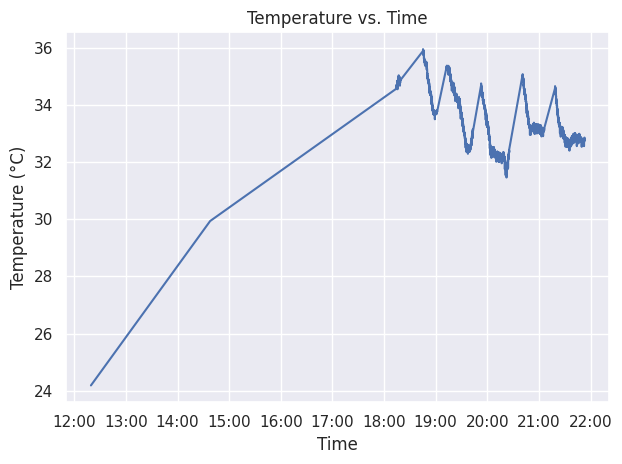

In [14]:
#TEMP IN AIR
#change time from object to datetime object
in_flight['Time'] = pd.to_datetime(in_flight['Time'])
fig, ax = plt.subplots()
ax.plot(in_flight['Time'], in_flight['temperature_air_degC'])

# # Customize the x-axis tick labels
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM

# Customize the graph
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Time')

# # Rotate the x-axis tick labels for better readability (optional)
# plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()


In [15]:
in_flight['3_tension_ratios'] = in_flight['tension_aft_N'] / (in_flight['tension_left_N'] + in_flight['tension_right_N'])
# do aft divided by sum of left and right
in_flight.head()

,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_NED_mPs,wind_direction_air_NED_deg,wind_elevation_air_NED_deg,humidity_air_pct,temperature_air_degC,pressure_ground_Pa,humidity_ground_pct,temperature_ground_degC,pressure_air_Pa,3_tension_ratios
44305,2023-06-01 12:19:23,1034.016910,1650.488926,1254.116213,1262.613070,0.002521,333.916440,0.663894,266.421388,18.892440,52.037094,24.186509,101416.974394,45.887617,25.080701,89244.527333,0.655807
52616,2023-06-01 14:37:54,1034.016832,1627.167835,1196.070823,1226.319909,0.003436,19.225440,1.754888,172.904984,23.959125,37.125755,29.939246,101448.713644,36.628304,30.964668,89276.267497,0.671720
65583,2023-06-01 18:14:01,100.001040,980.559026,515.240102,534.988579,0.003186,333.982360,0.810964,110.173644,-30.889551,23.770860,34.565851,101167.943357,23.883778,35.908665,99990.731118,0.933662
65584,2023-06-01 18:14:02,100.003359,993.009669,522.879253,539.194478,0.002796,333.949400,0.634367,145.910388,-47.589808,23.770860,34.571955,101152.073732,23.868519,35.893406,99974.834186,0.934972
65585,2023-06-01 18:14:03,100.002905,986.026747,534.692582,549.078746,0.002765,19.280373,0.309896,203.954914,-50.395912,23.789171,34.590266,101142.307809,24.579600,35.981909,99965.073608,0.909811


In [16]:
in_flight['gradient'] = in_flight['3_tension_ratios'].diff()

In [17]:
in_flight.head()

,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_NED_mPs,wind_direction_air_NED_deg,wind_elevation_air_NED_deg,humidity_air_pct,temperature_air_degC,pressure_ground_Pa,humidity_ground_pct,temperature_ground_degC,pressure_air_Pa,3_tension_ratios,gradient
44305,2023-06-01 12:19:23,1034.016910,1650.488926,1254.116213,1262.613070,0.002521,333.916440,0.663894,266.421388,18.892440,52.037094,24.186509,101416.974394,45.887617,25.080701,89244.527333,0.655807,NaN
52616,2023-06-01 14:37:54,1034.016832,1627.167835,1196.070823,1226.319909,0.003436,19.225440,1.754888,172.904984,23.959125,37.125755,29.939246,101448.713644,36.628304,30.964668,89276.267497,0.671720,0.015913
65583,2023-06-01 18:14:01,100.001040,980.559026,515.240102,534.988579,0.003186,333.982360,0.810964,110.173644,-30.889551,23.770860,34.565851,101167.943357,23.883778,35.908665,99990.731118,0.933662,0.261943
65584,2023-06-01 18:14:02,100.003359,993.009669,522.879253,539.194478,0.002796,333.949400,0.634367,145.910388,-47.589808,23.770860,34.571955,101152.073732,23.868519,35.893406,99974.834186,0.934972,0.001310
65585,2023-06-01 18:14:03,100.002905,986.026747,534.692582,549.078746,0.002765,19.280373,0.309896,203.954914,-50.395912,23.789171,34.590266,101142.307809,24.579600,35.981909,99965.073608,0.909811,-0.025162


In [18]:
#ratio tension vs temperature





## Flight Data 04-18-23

In [19]:
df_04 = pd.read_csv('/work/Filtered Data 1-28-23/altaeros_flight_data_20230128_202200_filtered.csv')
#Step 1: Change time from object to datetime
df_04['Time'] = pd.to_datetime(df_04['Time'])
# add extra column that labels each row from 1 to end
df_04['label'] = df_04.reset_index().index + 1
label_column = df_04['label']
df_04.drop(columns=['label'], inplace=True)
df_04.insert(0, 'seconds', label_column)
#add ratios
df_04['3_tension_ratios'] = df_04['tension_aft_N'] / (df_04['tension_left_N'] + df_04['tension_right_N'])
in_flight['gradient'] = in_flight['3_tension_ratios'].diff()
#print first five rows
df_04.head()

,seconds,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_SAN_mPs,wind_direction_air_SAN_deg,wind_elevation_air_SAN_deg,wind_speed_air_CVA_mPs,wind_direction_air_CVA_deg,humidity_air_pct,temperature_air_degC,pressure_ground_Pa,humidity_ground_pct,temperature_ground_degC,3_tension_ratios
0,1,2023-01-28 20:22:00,245.718495,1274.752642,582.687768,762.159510,2.073759,176.933390,9.952054,260.873830,-1.719433,11.630555,252.642778,41.718606,5.770975,101519.443341,36.412782,9.117206,0.947879
1,2,2023-01-28 20:22:00,245.720728,1275.501963,583.555447,763.777219,2.075530,177.023472,9.953298,260.794296,-1.689921,11.639458,252.470178,41.718909,5.771407,101519.325097,36.412041,9.116833,0.946687
2,3,2023-01-28 20:22:00,245.723150,1276.157077,583.806219,765.165976,2.077339,177.110090,9.951270,260.746218,-1.672404,11.649768,252.330173,41.718907,5.771646,101518.131515,36.411740,9.116943,0.946022
3,4,2023-01-28 20:22:00,245.725481,1276.751026,584.139016,766.607970,2.079079,177.193438,9.956299,260.680403,-1.647354,11.617455,252.048927,41.719077,5.772337,101516.982974,36.411450,9.117050,0.945218
4,5,2023-01-28 20:22:00,245.727816,1277.377703,584.634050,768.002771,2.080959,177.273700,9.961847,260.632447,-1.627292,11.586723,251.776508,41.718789,5.773285,101516.803829,36.411170,9.116587,0.944361


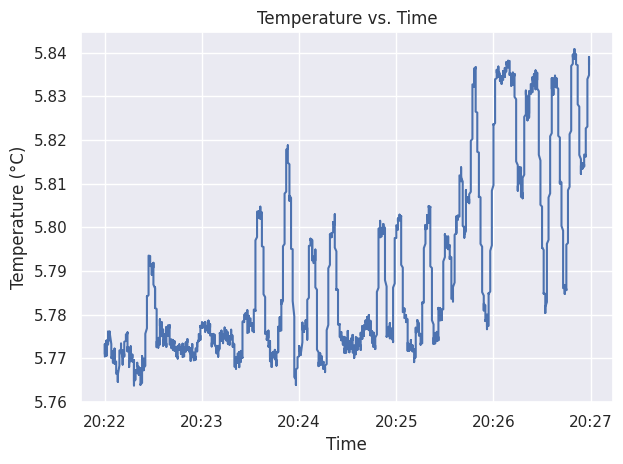

In [20]:
# Step 2: Filter the DataFrame for the desired times (e.g., between 00:00:00 and 05:37:01 "target altitude 250m")
start_time = pd.to_datetime('2023-04-18 00:00:00')
end_time = pd.to_datetime('2023-04-18 05:37:01')
filtered_df = df_04[(df_04['Time'] >= start_time) & (df_04['Time'] <= end_time)]

# Step 3: Plot the filtered data 
fig, ax = plt.subplots()
ax.plot(df_04['Time'], df_04['temperature_air_degC'])
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM

# Customize the graph
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Time')

# # Rotate the x-axis tick labels for better readability (optional)
# plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()
# plt.figure(figsize=(8, 6))
# plt.plot(filtered_df['Time'], filtered_df['seconds'], marker='o', linestyle='-')
# plt.xlabel('Timestamp')
# plt.ylabel('seconds')
# plt.title('Data between 00:00:00 and 05:37:01')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()


In [21]:
# plt.xlabel('Time')
# plt.ylabel('Tension Ratio Rate of Change')  
# # Add legend 
# ax.legend(loc='upper left')  
# ax.set_title("Tension Rate vs Time") 
# # Customize the x-axis tick labels
# ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# # Rotate the x-axis tick labels for better readability (optional)
# plt.xticks(rotation=45)

# # TENSION RATIOS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# fig, ax3 = plt.subplots(1, 1)
# ax3.plot(df_04['Time'][::400], df_04['aft_ratio'][::400],color='red',linewidth=0.5, label='Aft Ratio')
# ax3.plot(df_04['Time'][::400], df_04['left_ratio'][::400],color='blue',linewidth=0.5, label='Port Ratio')
# ax3.plot(df_04['Time'][::400], df_04['right_ratio'][::400],color='black',linewidth=0.5, label='Starboard Ratio')
# plt.xlabel('Time')
# plt.ylabel('Tension Ratio')  
# # Add legend 
# ax3.legend(loc='upper left')  
# ax3.set_title("Tension Ratio vs Time") 
# # Customize the x-axis tick labels
# ax3.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# # Rotate the x-axis tick labels for better readability (optional)
# plt.xticks(rotation=45)

# plt.show()
# df.head(5)

In [22]:
# add total tension and see if there is more correlation with other variables

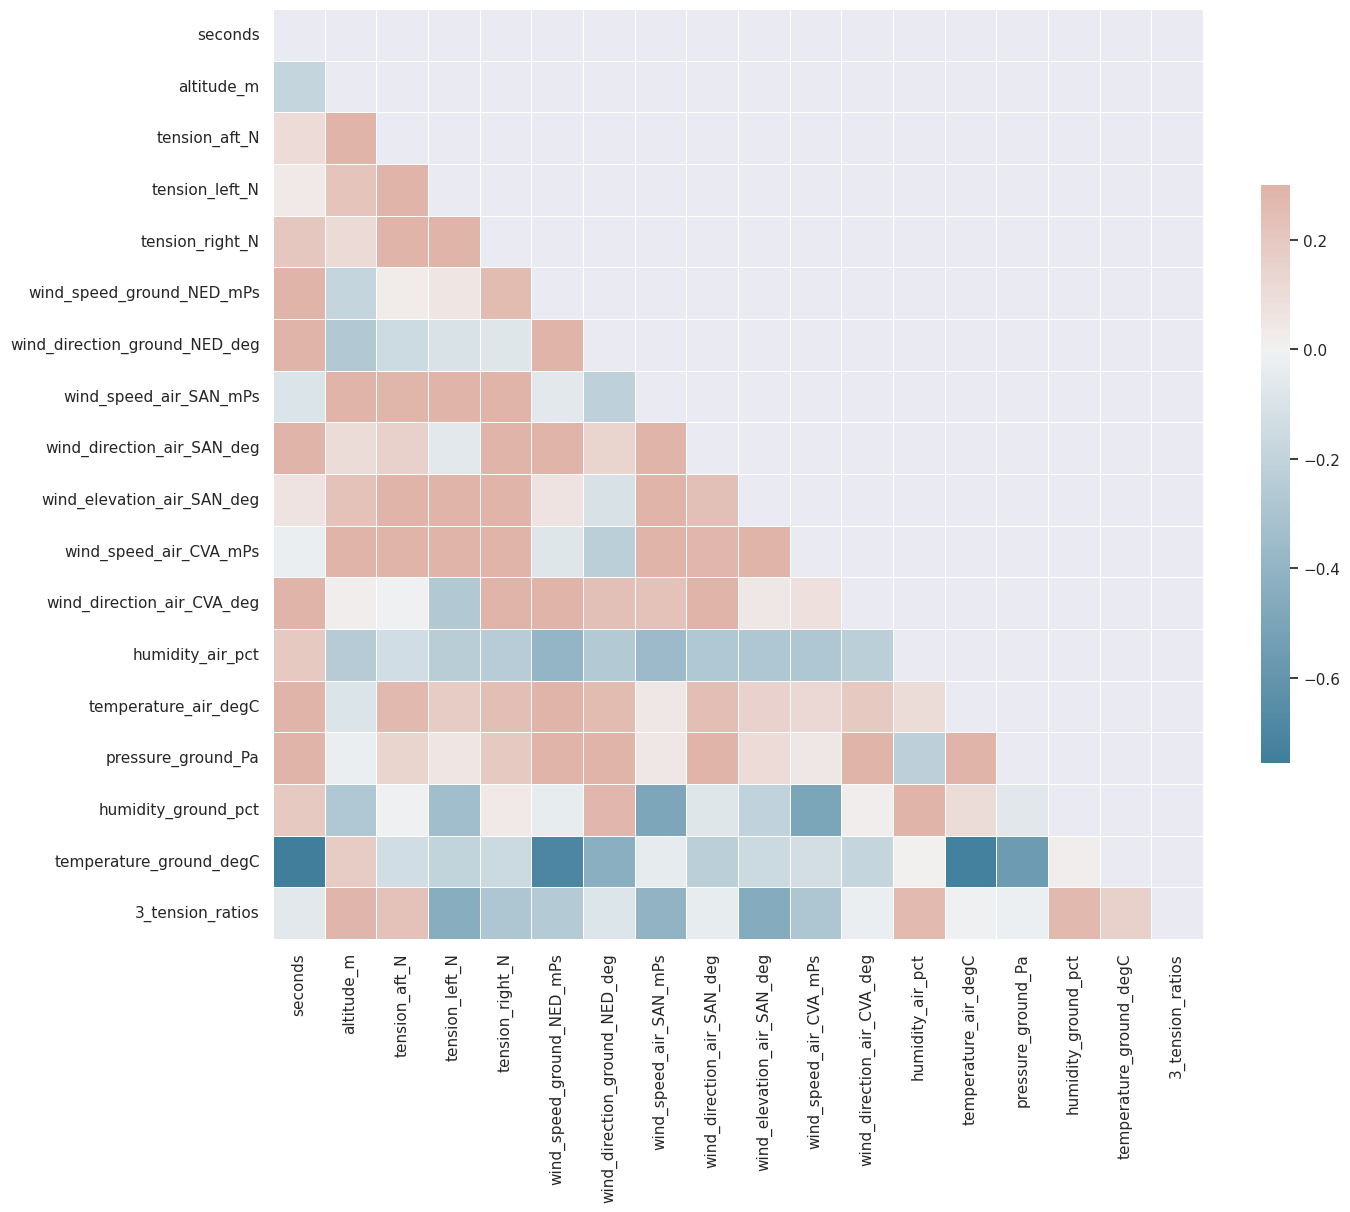

In [23]:
# Heat Map of Correlation
import seaborn as sns
# Calculate the correlation matrix
corr = df_04.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

In [24]:
# look at total tension rate of change and ratio to determine updrafts

In [25]:
df_04 = pd.read_csv('/work/Filtered Data 1-28-23/altaeros_flight_data_20230128_202200_filtered.csv')

## LSTM Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

# Step 1: Data Preprocessing
# Assuming your dataset 'df' has columns: 'timestamp', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction', 'altitude'

# Step 2: Data Normalization
scaler = MinMaxScaler()
normalized_weather_data = scaler.fit_transform(df_04[['temperature_air_degC', 'humidity_air_pct']])

# Step 3: Sequencing Data
sequence_length = 24  # Choose the number of time steps in each sequence
sequences = []
labels = []
for i in range(len(normalized_weather_data) - sequence_length):
    sequence = normalized_weather_data[i:i+sequence_length]
    label = normalized_weather_data[i+sequence_length]  # Forecasting the next data point (temperature, humidity, etc.)
    sequences.append(sequence)
    labels.append(label)

sequences = np.array(sequences)
labels = np.array(labels)

# Step 4: Train-Test Split
split_ratio = 0.8  # 80% training, 20% testing
split_index = int(len(sequences) * split_ratio)
train_sequences, test_sequences = sequences[:split_index], sequences[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Step 8: Data Reshaping
train_sequences = np.reshape(train_sequences, (train_sequences.shape[0], sequence_length, 2))  # 6 features as input
test_sequences = np.reshape(test_sequences, (test_sequences.shape[0], sequence_length, 2))

# Step 9: Building and Training the LSTM Model
model = keras.Sequential([
    keras.layers.LSTM(units=64, input_shape=(sequence_length, 2)),  # 6 features as input
    keras.layers.Dense(2)  # Output layer with 6 features as output
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences, train_labels, epochs=35, batch_size=32)

# Step 10: Model Evaluation and Weather Prediction
loss = model.evaluate(test_sequences, test_labels)
print(f"Test Loss: {loss}")

# You can use the trained model to predict future weather conditions.
# For prediction, you need to have the input sequence for the future time steps (including altitude).

# For example, to predict one future data point (temperature, humidity, etc.):
# future_data_point = np.array([[normalized_temperature, normalized_humidity, normalized_pressure, normalized_wind_speed, normalized_wind_direction, normalized_altitude]])
# future_data_point = np.reshape(future_data_point, (1, sequence_length, 6))  # Reshape to match the input shape
# predicted_data_point = model.predict(future_data_point)
# predicted_data_point = scaler.inverse_transform(predicted_data_point)  # Inverse transform to get the original scale


2023-11-08 02:46:38.826246: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-08 02:46:38.948446: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-08 02:46:38.948501: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-08 02:46:38.967780: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 02:46:40.048593: W tensorflow/stream_executor/platform/de

In [ ]:
#plot loss/epoch to see the trend 
#use unseen data and use that as test set in order to see if the prediction is accurate and not just overfitted

## LSTM Model Evaluation

38/38 [==============================] - 0s 5ms/step - loss: 4.7089e-05
Test Loss: 4.708873530034907e-05
38/38 [==============================] - 1s 4ms/step


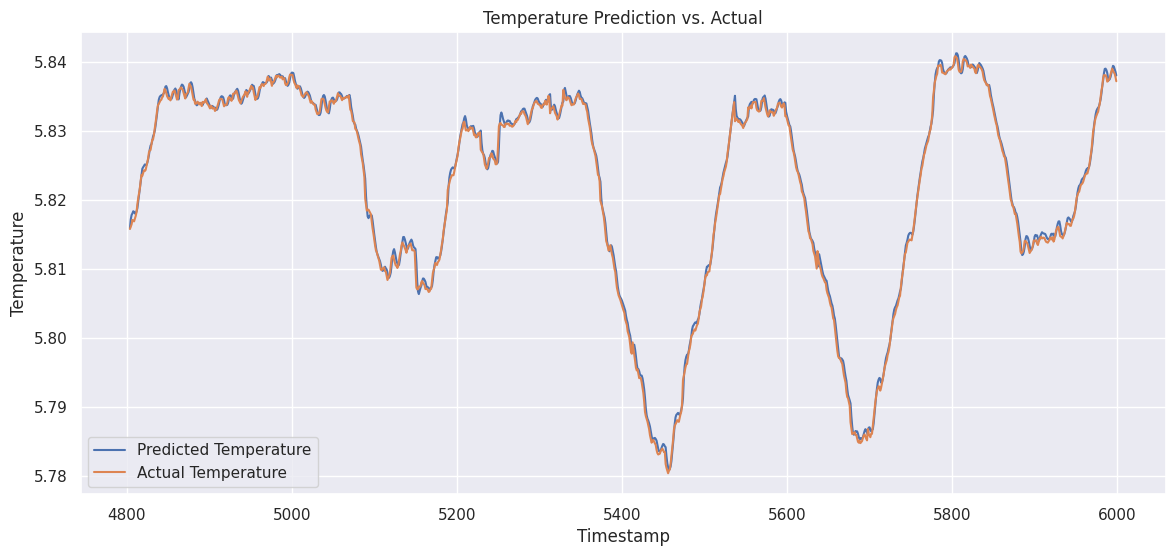

In [ ]:
# Step 10: Model Evaluation and Weather Prediction
loss = model.evaluate(test_sequences, test_labels)
print(f"Test Loss: {loss}")

# Step 11: Comparing Predictions to Actual Values
# Make predictions on the test data
predicted_labels = model.predict(test_sequences)

# Inverse transform the predictions and actual labels to get the original scale
predicted_labels = scaler.inverse_transform(predicted_labels)
test_labels_original = scaler.inverse_transform(test_labels)

# Plot the predicted and actual values
plt.figure(figsize=(14, 6))
plt.plot(df_04.index[-len(predicted_labels):], predicted_labels[:, 0], label='Predicted Temperature')
plt.plot(df_04.index[-len(predicted_labels):], test_labels_original[:, 0], label='Actual Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature Prediction vs. Actual')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# filter the noise in temperature 
#moving average filter (calculate the average 
# available in numpy moving average, moving median

In [ ]:
df['moving_avg_temp'] = df['temperature_air_degC'].rolling(window= 100).mean() #calculating average every five samples
#find way to apply operation to all the columns at the same time
#not good at removing extremely large outliers and data would be skewed heavily by outlier
#can use moving median to get something more in the middle, even with outlier
#there are filters that are good for real time data such as signal processing 
#applies to images as well
## use simple moving average (linear scaling, can use a second order weight )
df.head() 


,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_NED_mPs,wind_direction_air_NED_deg,wind_elevation_air_NED_deg,humidity_air_pct,temperature_air_degC,pressure_ground_Pa,humidity_ground_pct,temperature_ground_degC,pressure_air_Pa,moving_avg_temp
0,01-Jun-2023 00:00:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-Jun-2023 00:00:59,0.062369,1295.101265,928.840353,998.326861,0.004263,357.054353,0.462582,148.381723,23.582364,45.957809,22.242481,101413.312173,47.907941,22.538510,101412.577965,NaN
2,01-Jun-2023 00:01:00,0.062500,1299.618432,929.950766,993.638952,0.003909,357.054353,0.582689,175.438560,32.235878,45.957809,22.236377,101520.737326,48.020860,22.578184,101520.001573,NaN
3,01-Jun-2023 00:01:01,0.062673,1287.251064,911.318937,991.458719,0.003943,356.999420,0.665280,164.255887,0.152011,45.942550,22.282155,101401.104769,48.011704,22.514095,101400.366984,NaN
4,01-Jun-2023 00:01:02,0.062753,1289.298413,920.927652,989.036463,0.003867,357.032380,0.694746,147.639460,6.226266,45.936446,22.187547,101476.790673,48.026963,22.633118,101476.051939,NaN


In [ ]:
# use two features at a time depending on their correlation for the LSTM model and use multiple models 

## Second LSTM Model

In [ ]:
# Step 1: Data Preprocessing
# Assuming your dataset 'df' has columns: 'timestamp', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction', 'altitude'

# Step 2: Data Normalization
scaler = MinMaxScaler()
normalized_weather_data = scaler.fit_transform(df_04[['', '']])

# Step 3: Sequencing Data
sequence_length = 24  # Choose the number of time steps in each sequence
sequences = []
labels = []
for i in range(len(normalized_weather_data) - sequence_length):
    sequence = normalized_weather_data[i:i+sequence_length]
    label = normalized_weather_data[i+sequence_length]  # Forecasting the next data point (temperature, humidity, etc.)
    sequences.append(sequence)
    labels.append(label)

sequences = np.array(sequences)
labels = np.array(labels)

# Step 4: Train-Test Split
split_ratio = 0.8  # 80% training, 20% testing
split_index = int(len(sequences) * split_ratio)
train_sequences, test_sequences = sequences[:split_index], sequences[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Step 8: Data Reshaping
train_sequences = np.reshape(train_sequences, (train_sequences.shape[0], sequence_length, 2))  # 6 features as input
test_sequences = np.reshape(test_sequences, (test_sequences.shape[0], sequence_length, 2))

# Step 9: Building and Training the LSTM Model
model = keras.Sequential([
    keras.layers.LSTM(units=64, input_shape=(sequence_length, 2)),  # 6 features as input
    keras.layers.Dense(2)  # Output layer with 6 features as output
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences, train_labels, epochs=35, batch_size=32)

# Step 10: Model Evaluation and Weather Prediction
loss = model.evaluate(test_sequences, test_labels)
print(f"Test Loss: {loss}")

KeyError: "None of [Index(['', ''], dtype='object')] are in the [columns]"

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=db052f45-54fd-4c84-9a72-a96e050808ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>